In [1]:
from modelUtils.vae_utils import create_param_grid, VAECrossValidator
import os
from utils import data_validation
import matplotlib.pyplot as plt

In [2]:
cur = os.getcwd()
filepath = os.path.join(cur, '../outputs/megasample_cleaned.csv')
train_data, val_data, test_data = data_validation(filepath)
input_dim = train_data.element_spec[0].shape[0]


In [ ]:
# cross validation for the beta parameter
beta = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
epochs = 200
beta_grid = create_param_grid([[100, 100]], [30], [0.2], ['relu'], ['glorot_uniform'], betas=beta)
cv = VAECrossValidator(beta_grid, input_dim, 5, batch_size=128)
results = cv.cross_validate(train_data, epochs=epochs, verbose=0)



Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [100, 100], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [100, 100], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'vae': {'beta': 1e-06}}


Fold Progress: 100%|██████████████████████████████| 5/5 [02:19<00:00, 27.91s/it]



Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [100, 100], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [100, 100], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'vae': {'beta': 1e-05}}


Fold Progress:   0%|                                      | 0/5 [00:00<?, ?it/s]

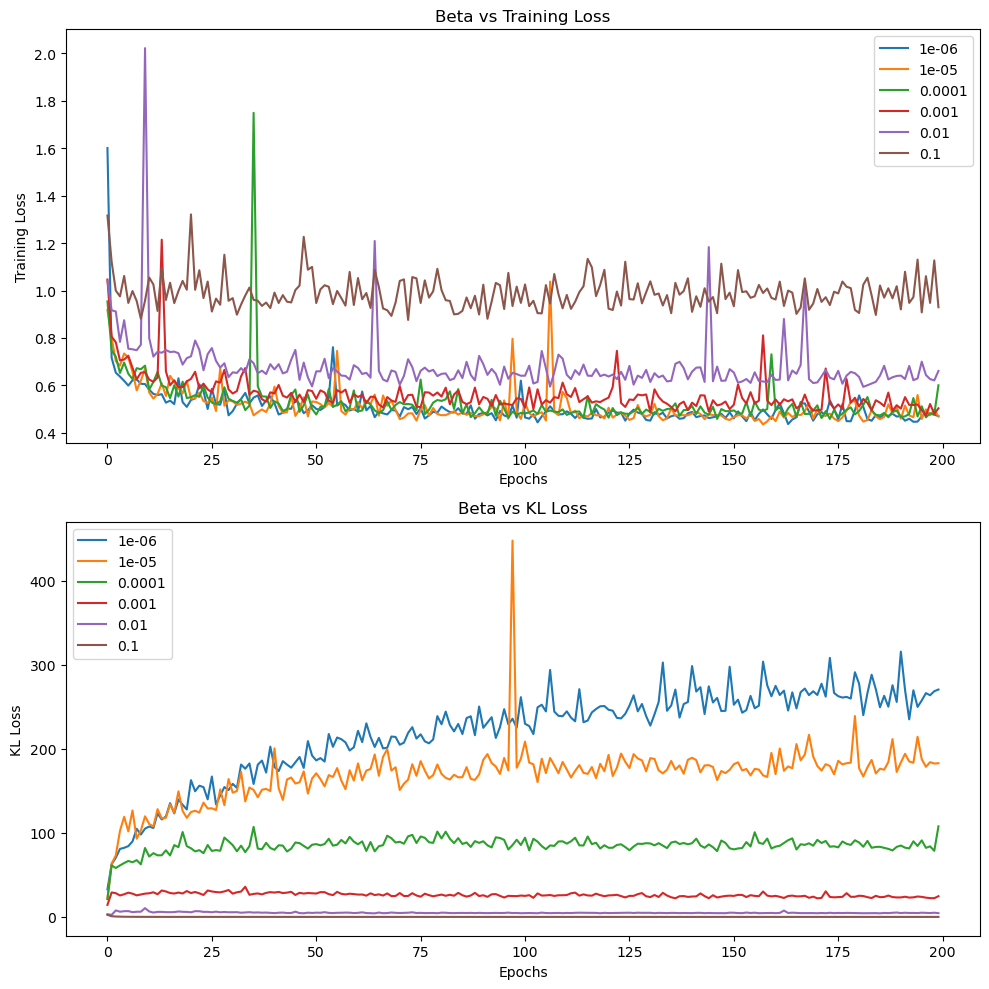

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

best_val_loss = 1000
best_params = None
for res in results:
    metrics = res[1]
    params = res[0]
    label = ''
    if metrics['recon_loss'] < best_val_loss:
        best_val_loss = metrics['recon_loss']
        best_params = params['vae']['beta']
    label = str(params['vae']['beta'])
    axs[0].plot(range(epochs), metrics['avg_training_losses'], label=label)
    axs[1].plot(range(epochs), metrics['avg_kl_losses'], label=label)

axs[0].legend()
axs[0].set_title('Beta vs Training Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Training Loss')

axs[1].legend()
axs[1].set_title('Beta vs KL Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('KL Loss')

plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.savefig('../outputs/Images/beta_vs_loss.png')


In [12]:
print(f'Best params: {best_params}, Best val loss: {best_val_loss}')


Best params: 1e-05, Best val loss: 0.3560976803302765


In [13]:
h_dims = [[50, 50], [100, 100], [150, 150], [200, 200], [250, 250], [300, 300], [150, 100, 50], [200, 150, 100],
          [250, 200, 150], [300, 200, 100]]
epochs = 50
h_dim_grid = create_param_grid(h_dims, [30], [0.2], ['relu'], ['glorot_uniform'], [.001])

In [14]:
cv = VAECrossValidator(h_dim_grid, input_dim, 5, batch_size=128)

In [15]:
results = cv.cross_validate(train_data, epochs=epochs, verbose=0)


Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [50, 50], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [50, 50], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'vae': {'beta': 0.001}}


Fold Progress: 100%|██████████████████████████████| 5/5 [00:37<00:00,  7.46s/it]



Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [100, 100], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [100, 100], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'vae': {'beta': 0.001}}


Fold Progress: 100%|██████████████████████████████| 5/5 [00:40<00:00,  8.16s/it]



Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [150, 150], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [150, 150], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'vae': {'beta': 0.001}}


Fold Progress: 100%|██████████████████████████████| 5/5 [00:50<00:00, 10.12s/it]



Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [200, 200], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [200, 200], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'vae': {'beta': 0.001}}


Fold Progress: 100%|██████████████████████████████| 5/5 [00:53<00:00, 10.61s/it]



Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [250, 250], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [250, 250], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'vae': {'beta': 0.001}}


Fold Progress: 100%|██████████████████████████████| 5/5 [00:49<00:00,  9.88s/it]



Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [300, 300], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [300, 300], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'vae': {'beta': 0.001}}


Fold Progress: 100%|██████████████████████████████| 5/5 [01:18<00:00, 15.61s/it]



Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [150, 100, 50], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [150, 100, 50], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'vae': {'beta': 0.001}}


Fold Progress: 100%|██████████████████████████████| 5/5 [01:02<00:00, 12.48s/it]



Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [200, 150, 100], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [200, 150, 100], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'vae': {'beta': 0.001}}


Fold Progress: 100%|██████████████████████████████| 5/5 [01:08<00:00, 13.68s/it]



Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [250, 200, 150], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [250, 200, 150], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'vae': {'beta': 0.001}}


Fold Progress: 100%|██████████████████████████████| 5/5 [01:21<00:00, 16.32s/it]



Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [300, 200, 100], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [300, 200, 100], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'vae': {'beta': 0.001}}


Fold Progress: 100%|██████████████████████████████| 5/5 [01:12<00:00, 14.55s/it]


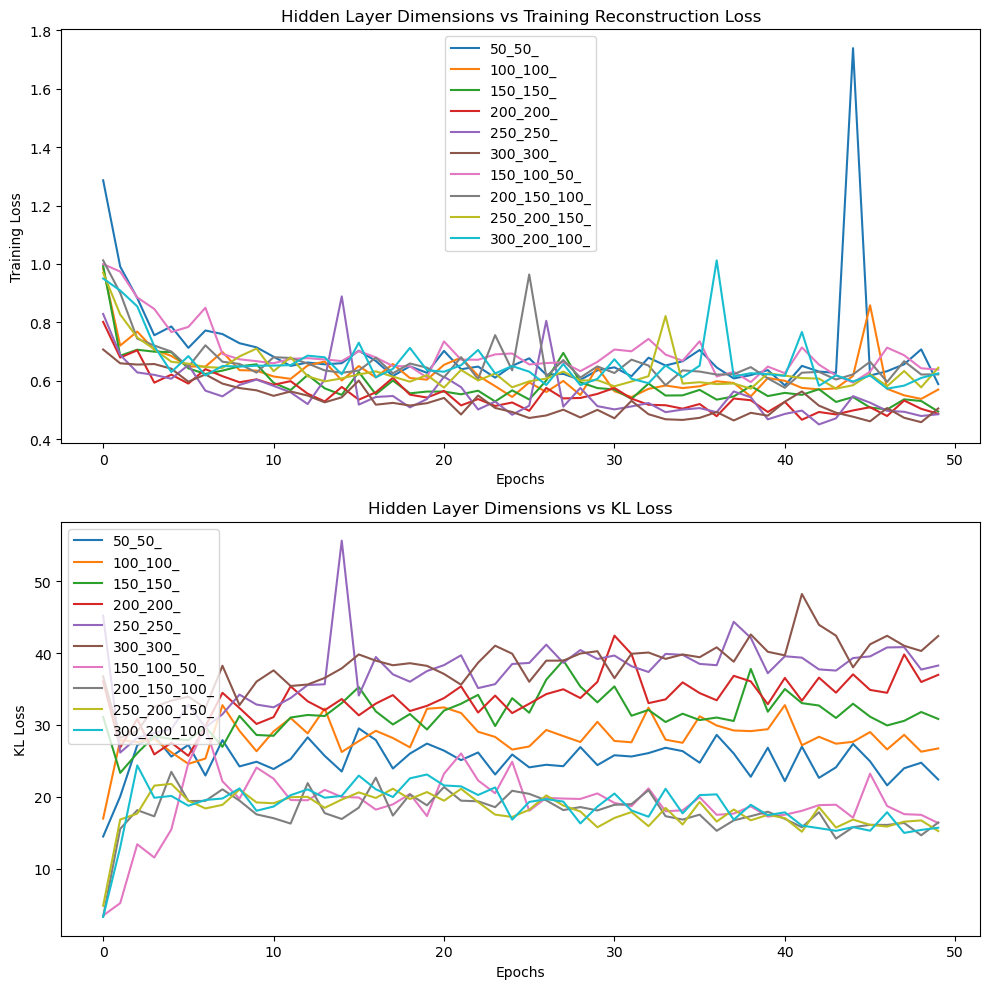

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

best_val_loss = 1000
best_params = None
for res in results:
    metrics = res[1]
    params = res[0]
    label = ''
    if metrics['recon_loss'] < best_val_loss:
        best_val_loss = metrics['recon_loss']
        best_params = params['encoder']['hidden_dim']
    for dim in params['encoder']['hidden_dim']:
        label += str(dim) + '_'
    axs[0].plot(range(epochs), metrics['avg_training_losses'], label=label)
    axs[1].plot(range(epochs), metrics['avg_kl_losses'], label=label)

axs[0].legend()
axs[0].set_title('Hidden Layer Dimensions vs Training Reconstruction Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Training Loss')

axs[1].legend()
axs[1].set_title('Hidden Layer Dimensions vs KL Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('KL Loss')

plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.savefig('../outputs/Images/h_dim_vs_loss.png')

In [18]:
print(f'Best params: {best_params}, Best val loss: {best_val_loss}')


Best params: [300, 300], Best val loss: 0.35223973393440244


In [3]:
latent_dims = [5, 10, 15, 20, 25, 30]
latent_dim_grid = create_param_grid([[300, 300]], latent_dims, [0.2], ['relu'], ['glorot_uniform'], [.001])


In [4]:
cv = VAECrossValidator(latent_dim_grid, input_dim, 5, batch_size=128)

In [5]:
results = cv.cross_validate(train_data, epochs=50, verbose=0)



Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [300, 300], 'initializer': 'glorot_uniform', 'latent_dim': 5}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [300, 300], 'initializer': 'glorot_uniform', 'latent_dim': 5}, 'vae': {'beta': 0.001}}


Fold Progress: 100%|██████████████████████████████| 5/5 [00:48<00:00,  9.64s/it]

INFO:tensorflow:Assets written to: ../outputs/models/vae\vae_h_dim_300_300_z_dim_5_dropout_02_init_glorot_uniform_act_relu\encoder\assets
INFO:tensorflow:Assets written to: ../outputs/models/vae\vae_h_dim_300_300_z_dim_5_dropout_02_init_glorot_uniform_act_relu\decoder\assets

Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [300, 300], 'initializer': 'glorot_uniform', 'latent_dim': 10}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [300, 300], 'initializer': 'glorot_uniform', 'latent_dim': 10}, 'vae': {'beta': 0.001}}


Fold Progress: 100%|██████████████████████████████| 5/5 [00:44<00:00,  8.97s/it]

INFO:tensorflow:Assets written to: ../outputs/models/vae\vae_h_dim_300_300_z_dim_10_dropout_02_init_glorot_uniform_act_relu\encoder\assets
INFO:tensorflow:Assets written to: ../outputs/models/vae\vae_h_dim_300_300_z_dim_10_dropout_02_init_glorot_uniform_act_relu\decoder\assets

Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [300, 300], 'initializer': 'glorot_uniform', 'latent_dim': 15}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [300, 300], 'initializer': 'glorot_uniform', 'latent_dim': 15}, 'vae': {'beta': 0.001}}


Fold Progress: 100%|██████████████████████████████| 5/5 [00:52<00:00, 10.53s/it]

INFO:tensorflow:Assets written to: ../outputs/models/vae\vae_h_dim_300_300_z_dim_15_dropout_02_init_glorot_uniform_act_relu\encoder\assets
INFO:tensorflow:Assets written to: ../outputs/models/vae\vae_h_dim_300_300_z_dim_15_dropout_02_init_glorot_uniform_act_relu\decoder\assets

Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [300, 300], 'initializer': 'glorot_uniform', 'latent_dim': 20}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [300, 300], 'initializer': 'glorot_uniform', 'latent_dim': 20}, 'vae': {'beta': 0.001}}


Fold Progress: 100%|██████████████████████████████| 5/5 [01:03<00:00, 12.75s/it]

INFO:tensorflow:Assets written to: ../outputs/models/vae\vae_h_dim_300_300_z_dim_20_dropout_02_init_glorot_uniform_act_relu\encoder\assets
INFO:tensorflow:Assets written to: ../outputs/models/vae\vae_h_dim_300_300_z_dim_20_dropout_02_init_glorot_uniform_act_relu\decoder\assets

Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [300, 300], 'initializer': 'glorot_uniform', 'latent_dim': 25}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [300, 300], 'initializer': 'glorot_uniform', 'latent_dim': 25}, 'vae': {'beta': 0.001}}


Fold Progress: 100%|██████████████████████████████| 5/5 [01:12<00:00, 14.57s/it]

INFO:tensorflow:Assets written to: ../outputs/models/vae\vae_h_dim_300_300_z_dim_25_dropout_02_init_glorot_uniform_act_relu\encoder\assets
INFO:tensorflow:Assets written to: ../outputs/models/vae\vae_h_dim_300_300_z_dim_25_dropout_02_init_glorot_uniform_act_relu\decoder\assets

Training model with parameters {'encoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [300, 300], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'decoder': {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_dim': [300, 300], 'initializer': 'glorot_uniform', 'latent_dim': 30}, 'vae': {'beta': 0.001}}


Fold Progress: 100%|██████████████████████████████| 5/5 [01:17<00:00, 15.49s/it]


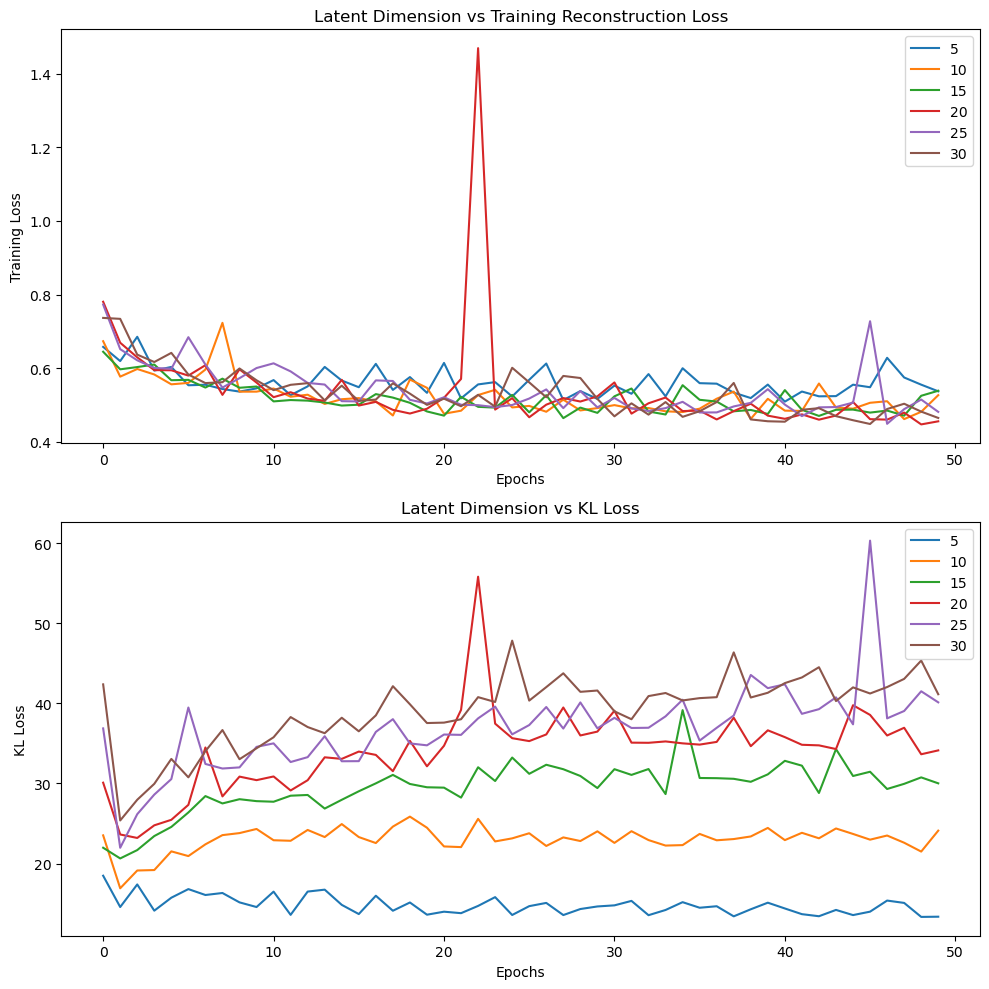

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

best_val_loss = 1000
best_params = None
for res in results:
    metrics = res[1]
    params = res[0]
    label = ''
    if metrics['recon_loss'] < best_val_loss:
        best_val_loss = metrics['recon_loss']
        best_params = params['encoder']['latent_dim']
    label = str(params['encoder']['latent_dim'])
    axs[0].plot(range(50), metrics['avg_training_losses'], label=label)
    axs[1].plot(range(50), metrics['avg_kl_losses'], label=label)

axs[0].legend()
axs[0].set_title('Latent Dimension vs Training Reconstruction Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Training Loss')

axs[1].legend()
axs[1].set_title('Latent Dimension vs KL Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('KL Loss')

plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.savefig('../outputs/Images/latent_dim_vs_loss.png')


In [8]:
print(f'Best params: {best_params}, Best val loss: {best_val_loss}')


Best params: 30, Best val loss: 0.34994677305221555
